Code from here
https://pytorch.org/tutorials/intermediate/char_rnn_classification_tutorial.html

In [1]:
from __future__ import unicode_literals, print_function, division
from io import open
import glob
import os

def findFiles(path): return glob.glob(path)

print(findFiles('data/names/*.txt'))

import unicodedata
import string

all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

# Turn a Unicode string to plain ASCII, thanks to https://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

print(unicodeToAscii('Ślusàrski'))

# Build the category_lines dictionary, a list of names per language
category_lines = {}
all_categories = []

# Read a file and split into lines
def readLines(filename):
    lines = open(filename, encoding='utf-8').read().strip().split('\n')
    return [unicodeToAscii(line) for line in lines]

for filename in findFiles('data/names/*.txt'):
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories.append(category)
    lines = readLines(filename)
    category_lines[category] = lines

n_categories = len(all_categories)

['data/names\\Arabic.txt', 'data/names\\Chinese.txt', 'data/names\\Czech.txt', 'data/names\\Dutch.txt', 'data/names\\English.txt', 'data/names\\French.txt', 'data/names\\German.txt', 'data/names\\Greek.txt', 'data/names\\Irish.txt', 'data/names\\Italian.txt', 'data/names\\Japanese.txt', 'data/names\\Korean.txt', 'data/names\\Polish.txt', 'data/names\\Portuguese.txt', 'data/names\\Russian.txt', 'data/names\\Scottish.txt', 'data/names\\Spanish.txt', 'data/names\\Vietnamese.txt']
Slusarski


In [2]:
print(f'Categories: {n_categories}')

Categories: 18


In [3]:
print(f'Categories: {all_categories}')

Categories: ['Arabic', 'Chinese', 'Czech', 'Dutch', 'English', 'French', 'German', 'Greek', 'Irish', 'Italian', 'Japanese', 'Korean', 'Polish', 'Portuguese', 'Russian', 'Scottish', 'Spanish', 'Vietnamese']


In [4]:
print(category_lines[all_categories[7]])

['Adamidis', 'Adamou', 'Agelakos', 'Akrivopoulos', 'Alexandropoulos', 'Anetakis', 'Angelopoulos', 'Antimisiaris', 'Antipas', 'Antonakos', 'Antoniadis', 'Antonopoulos', 'Antonopoulos', 'Antonopoulos', 'Arvanitoyannis', 'Avgerinos', 'Banos', 'Batsakis', 'Bekyros', 'Belesis', 'Bertsimas', 'Bilias', 'Blades', 'Bouloukos', 'Brisimitzakis', 'Bursinos', 'Calogerakis', 'Calpis', 'Chellos', 'Christakos', 'Christodoulou', 'Christou', 'Chrysanthopoulos', 'Chrysanthopoulos', 'Comino', 'Close', 'Close', 'Close', 'Close', 'Close', 'Close', 'Close', 'Close', 'Dalianis', 'Danas', 'Dasios', 'Demakis', 'Demarchis', 'Demas', 'Demetrious', 'Dertilis', 'Diakogeorgiou', 'Dioletis', 'Dounias', 'Dritsas', 'Drivakis', 'Eatros', 'Egonidis', 'Eliopoulos', 'Forakis', 'Fotopoulos', 'Fourakis', 'Frangopoulos', 'Galanopoulos', 'Garofalis', 'Gavril', 'Gavrilopoulos', 'Georgeakopoulos', 'Geracimos', 'Gianakopulos', 'Giannakopoulos', 'Giannakos', 'Glynatsis', 'Gomatos', 'Grammatakakis', 'Gravari', 'Hadjiyianakies', 'Ha

In [5]:
print(category_lines['Italian'][:5])

['Abandonato', 'Abatangelo', 'Abatantuono', 'Abate', 'Abategiovanni']


In [6]:
import torch

# Find letter index from all_letters, e.g. "a" = 0
def letterToIndex(letter):
    return all_letters.find(letter)

# Just for demonstration, turn a letter into a <1 x n_letters> Tensor
def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters)
    tensor[0][letterToIndex(letter)] = 1
    return tensor

# Turn a line into a <line_length x 1 x n_letters>,
# or an array of one-hot letter vectors
def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor

print(letterToTensor('J'))

print(lineToTensor('Jones').size())

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])
torch.Size([5, 1, 57])


In [ ]:
all_letters, len(all_letters)

In [ ]:
letter_to_index = {letterToIndex(l):l for l in all_letters}
letter_to_index

In [ ]:
index_to_letter = [all_letters[i] for i in range(len(all_letters))]
index_to_letter

In [8]:
import torch.nn as nn
#import torch.nn.functional as F

In [154]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

n_hidden = 128
rnn = RNN(n_letters, n_hidden, n_categories)

In [24]:
#https://pytorch.org/docs/master/nn.html#torch.nn.GRU

#GRU based
class LanguageClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LanguageClassifier, self).__init__()
        
        self.hidden_size = hidden_size
        
        self.gru = nn.GRU(input_size = input_size, hidden_size = hidden_size, num_layers = 1)
        
        # Kaiming initialization, no difference! 
        #nn.init.kaiming_normal_(self.gru.weight_ih_l0, mode='fan_out', nonlinearity='relu')
        #nn.init.kaiming_normal_(self.gru.weight_hh_l0, mode='fan_out', nonlinearity='relu')
        
        self.dense1 = nn.Linear(hidden_size, output_size)
        
        self.softmax = nn.LogSoftmax(dim=1)
        
    def forward(self, input, hidden):
        #combined = torch.cat((input, hidden), 1) 
        
        output, hidden = self.gru(input, hidden)
        #Get only last output
        output = self.dense1(output[-1, :, :])
        output = self.softmax(output)
        
        return output, hidden
    
    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size)
        
n_hidden = 128
languageClassifier = LanguageClassifier(n_letters, n_hidden, n_categories)

In [ ]:
input = letterToTensor('A')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input, hidden)
output, next_hidden

In [ ]:
input = lineToTensor('Albert')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input[0], hidden)
print(output)

In [ ]:
#input.shape[0]
#hidden.repeat(input.shape[0],1).shape
input[0].unsqueeze_(0).shape

GRU

In [12]:
input = lineToTensor('Albert')
print(f'Input: {input.shape}')
#input.unsqueeze_(1)
#print(input.shape)
hidden = torch.zeros(1, 1, n_hidden)
print(f'Hidden: {hidden.shape}')

output, next_hidden = languageClassifier(input, hidden)
print(f'Output: {output.shape}')
print(f'Next hidden: {next_hidden.shape}')
#print(output)

Input: torch.Size([6, 1, 57])
Hidden: torch.Size([1, 1, 128])
Output: torch.Size([1, 18])
Next hidden: torch.Size([1, 1, 128])


In [13]:
def categoryFromOutput(output):
    top_n, top_i = output.topk(1)
    #print(top_n, top_i.data)
    category_i = top_i[0].item()
    return all_categories[category_i], category_i

print(output, categoryFromOutput(output))

tensor([[-2.8524, -2.8775, -2.9286, -2.8969, -2.8124, -2.8994, -2.7892, -2.8225,
         -2.9458, -2.9423, -2.8419, -2.9477, -2.9655, -2.8750, -2.9441, -3.0038,
         -2.8373, -2.8745]], grad_fn=<LogSoftmaxBackward>) ('German', 6)


In [14]:
import random

def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

def randomTrainingExample():
    category = randomChoice(all_categories)
    line = randomChoice(category_lines[category])
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    line_tensor = lineToTensor(line)
    return category, line, category_tensor, line_tensor

for i in range(10):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    print('category =', category, '/ line =', line)

category = Greek / line = Paitakes
category = Vietnamese / line = Phung
category = Greek / line = Danas
category = Czech / line = Kulhanek
category = Vietnamese / line = Dam
category = Dutch / line = Laar
category = German / line = Brose
category = Arabic / line = Maroun
category = Japanese / line = Gakusha
category = Irish / line = Clark


In [15]:
# For the loss function nn.NLLLoss is appropriate, since the last layer of the RNN is nn.LogSoftmax.
criterion = nn.NLLLoss()

RNN training (from the tutorial)

In [152]:
learning_rate = 0.005 # If you set this too high, it might explode. If too low, it might not learn

def train(category_tensor, line_tensor):
    hidden = rnn.initHidden()

    rnn.zero_grad()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    loss = criterion(output, category_tensor)
    loss.backward()

    # Add parameters' gradients to their values, multiplied by learning rate
    for p in rnn.parameters():
        p.data.add_(-learning_rate, p.grad.data)

    return output, loss.item()

GRU training

In [16]:
learning_rate = 0.005 # If you set this too high, it might explode. If too low, it might not learn

def trainGRU(category_tensor, line_tensor):
    hidden = languageClassifier.initHidden()

    languageClassifier.zero_grad()

    #for i in range(line_tensor.size()[0]):
    #    output, hidden = rnn(line_tensor[i], hidden)

    output, _ = languageClassifier(line_tensor, hidden)
    
    loss = criterion(output, category_tensor)
    loss.backward()

    # Add parameters' gradients to their values, multiplied by learning rate
    for p in languageClassifier.parameters():
        p.data.add_(-learning_rate, p.grad.data)

    return output, loss.item()

In [25]:
import time
import math

n_iters = 100000
print_every = 5000
plot_every = 1000

# Keep track of losses for plotting
current_loss = 0
all_losses = []

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    
    #RNN
    #output, loss = train(category_tensor, line_tensor)
    
    #GRU
    output, loss = trainGRU(category_tensor, line_tensor)
    
    current_loss += loss

    # Print iter number, loss, name and guess
    if iter % print_every == 0:
        guess, guess_i = categoryFromOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))

    # Add current loss avg to list of losses
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

5000 5% (0m 29s) 2.7705 Albert / German ✗ (Russian)
10000 10% (1m 2s) 2.5328 Vanitchev / Russian ✓
15000 15% (1m 35s) 2.6623 Borde / English ✗ (French)
20000 20% (2m 8s) 2.9039 O'Keefe / Dutch ✗ (Irish)
25000 25% (2m 40s) 2.0678 Moralez / Spanish ✓
30000 30% (3m 13s) 1.4266 Garcia / Spanish ✓
35000 35% (3m 45s) 2.2959 Wallace / French ✗ (Scottish)
40000 40% (4m 18s) 0.7271 Bakhtizin / Russian ✓
45000 45% (4m 50s) 2.6766 Michaud / Arabic ✗ (French)
50000 50% (5m 24s) 0.8914 Han / Chinese ✓
55000 55% (5m 56s) 2.9630 Hunter / German ✗ (Scottish)
60000 60% (6m 29s) 0.1371 Romagnoli / Italian ✓
65000 65% (7m 2s) 1.7320 Espinoza / Polish ✗ (Spanish)
70000 70% (7m 35s) 2.1750 Peatain / French ✗ (Irish)
75000 75% (8m 7s) 0.6757 Travert / French ✓
80000 80% (8m 44s) 1.8360 Traverse / Italian ✗ (French)
85000 85% (9m 15s) 0.0536 Yoshikawa / Japanese ✓
90000 90% (9m 53s) 1.3087 Espinoza / Polish ✗ (Spanish)
95000 95% (10m 28s) 2.6008 Mcbain / French ✗ (English)
100000 100% (11m 4s) 1.9642 Garcon 

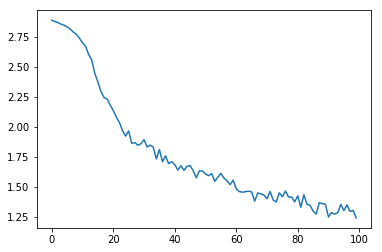

In [27]:
#Plotting the Results
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)

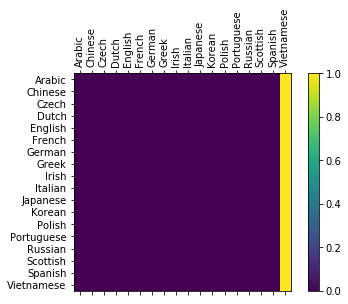

In [149]:
#Evaluating the Results RNN
# Keep track of correct guesses in a confusion matrix
confusion = torch.zeros(n_categories, n_categories)
n_confusion = 10000

# Just return an output given a line
def evaluate(line_tensor):
    hidden = rnn.initHidden()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    return output

# Go through a bunch of examples and record which are correctly guessed
for i in range(n_confusion):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output = evaluate(line_tensor)
    guess, guess_i = categoryFromOutput(output)
    category_i = all_categories.index(category)
    confusion[category_i][guess_i] += 1

# Normalize by dividing every row by its sum
for i in range(n_categories):
    confusion[i] = confusion[i] / confusion[i].sum()

# Set up plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)

# Set up axes
ax.set_xticklabels([''] + all_categories, rotation=90)
ax.set_yticklabels([''] + all_categories)

# Force label at every tick
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# sphinx_gallery_thumbnail_number = 2
plt.show()

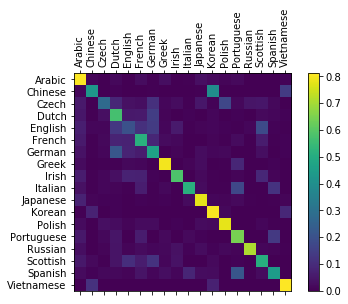

In [145]:
#Evaluating the Results GRU
# Keep track of correct guesses in a confusion matrix
confusion = torch.zeros(n_categories, n_categories)
n_confusion = 10000

# Just return an output given a line
def evaluateGRU(line_tensor):
    hidden = languageClassifier.initHidden()

    output, hidden = languageClassifier(line_tensor, hidden)

    return output

# Go through a bunch of examples and record which are correctly guessed
for i in range(n_confusion):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output = evaluate(line_tensor)
    guess, guess_i = categoryFromOutput(output)
    category_i = all_categories.index(category)
    confusion[category_i][guess_i] += 1

# Normalize by dividing every row by its sum
for i in range(n_categories):
    confusion[i] = confusion[i] / confusion[i].sum()

# Set up plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)

# Set up axes
ax.set_xticklabels([''] + all_categories, rotation=90)
ax.set_yticklabels([''] + all_categories)

# Force label at every tick
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# sphinx_gallery_thumbnail_number = 2
plt.show()

In [157]:
# Running on User Input
def predict(input_line, n_predictions=3):
    print('\n> %s' % input_line)
    print('RNN')
    with torch.no_grad():
        output = evaluate(lineToTensor(input_line))

        # Get top N categories
        topv, topi = output.topk(n_predictions, 1, True)
        predictions = []

        for i in range(n_predictions):
            value = topv[0][i].item()
            category_index = topi[0][i].item()
            print('(%.2f) %s' % (value, all_categories[category_index]))
            predictions.append([value, all_categories[category_index]])
            
    print('GRU')
    with torch.no_grad():
        output = evaluateGRU(lineToTensor(input_line))

        # Get top N categories
        topv, topi = output.topk(n_predictions, 1, True)
        predictions = []

        for i in range(n_predictions):
            value = topv[0][i].item()
            category_index = topi[0][i].item()
            print('(%.2f) %s' % (value, all_categories[category_index]))
            predictions.append([value, all_categories[category_index]])

predict('Dovesky')
predict('Jackson')
predict('Satoshi')


> Dovesky
RNN
(-0.64) Russian
(-1.18) Czech
(-2.46) Polish
GRU
(-0.59) Russian
(-1.71) Czech
(-2.19) English

> Jackson
RNN
(-0.16) Scottish
(-2.58) English
(-3.75) Dutch
GRU
(-0.43) Scottish
(-1.71) English
(-2.88) Polish

> Satoshi
RNN
(-0.87) Japanese
(-1.34) Italian
(-2.51) Polish
GRU
(-0.74) Arabic
(-0.76) Japanese
(-3.81) Polish


In [160]:
predict('Elena')


> Elena
RNN
(-0.96) Spanish
(-1.54) Italian
(-2.50) Czech
GRU
(-0.90) Spanish
(-1.50) Italian
(-2.11) Czech
